## Install Libraries

In [216]:
!pip3 install -r requirements_current.txt

In [2]:
# Generate requirements_current.txt
# ! pip list --format=freeze > requirements_current.txt

# Import Libraries

In [248]:
import importlib

In [200]:
import pandas as pd
import matplotlib.pyplot as plt

In [291]:
import models
import parameters
import preprocessing

In [292]:
importlib.reload(models)
importlib.reload(parameters)
importlib.reload(preprocessing)

<module 'preprocessing' from 'c:\\Users\\Loo Guan Yee\\OneDrive - National University of Singapore\\NUS\\2023 2024 Sem 2\\DSA4263\\DSA4263-Project\\preprocessing.py'>

# Import Dataset

In [251]:
df = pd.read_csv("Data/Raw/insurance_claims.csv")

# EDA Insight

# Random Forest New

In [263]:
import json
from sklearn.ensemble import RandomForestClassifier

# NOT ACTUAL PARAMS
tuned_params = {
    "n_estimators": 100,
    "max_depth": 10,
    "min_samples_split": 2,
    "min_samples_leaf": 1,
    "max_features": "auto",
    "bootstrap": True
}

In [264]:
X_train_non_normalized, X_test_non_normalized, y_train_non_normalized, y_test_non_normalized = preprocessing.preprocess_pipeline(df, encoding=True, normalization=False)
X_train_normalized, X_test_normalized, y_train_normalized, y_test_normalized = preprocessing.preprocess_pipeline(df, encoding=True, normalization=True)

In [265]:
rf_model = models.IndividualModel(
    model_func = RandomForestClassifier,
    param_info = parameters.RANDOM_FOREST_INFORMATION,
    X_train = X_train_non_normalized,
    X_test = X_test_non_normalized,
    y_train = y_train_non_normalized,
    y_test = y_test_non_normalized
    )

## Results without Tuning

In [266]:
rf_model.train()
rf_model.predict()

In [267]:
# No Tuning is already decent, with bad recall though
rf_model.evaluate()

{'accuracy': 0.815,
 'precision': 0.6363636363636364,
 'recall': 0.5714285714285714,
 'f1_score': 0.6021505376344085}

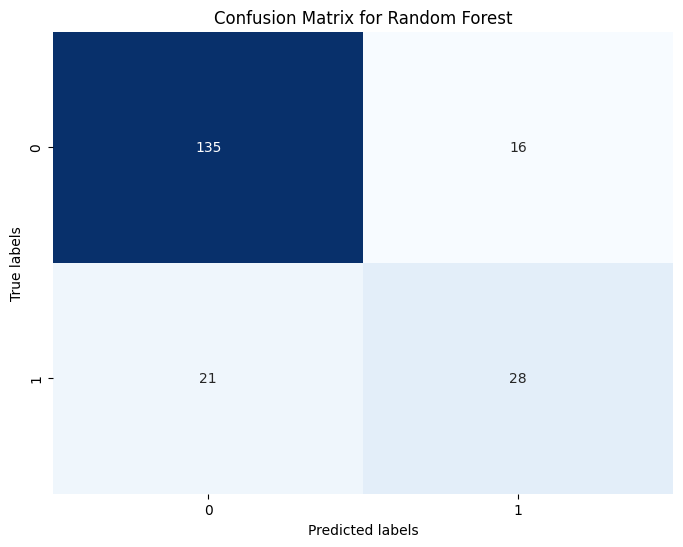

In [268]:
cm_rf_base = rf_model.plot_confusion_matrix()

## Results with Tuning

In [269]:
rf_model.finetune()

[I 2024-04-07 16:00:36,414] A new study created in memory with name: no-name-5e80b7a2-eec2-4f80-9f18-9cbc1aa20745
[I 2024-04-07 16:00:41,335] Trial 0 finished with value: 0.5906697108870781 and parameters: {'n_estimators': 100, 'max_depth': 8, 'criterion': 'log_loss', 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': None, 'bootstrap': False}. Best is trial 0 with value: 0.5906697108870781.
[I 2024-04-07 16:00:44,031] Trial 1 finished with value: 0.6230506369190603 and parameters: {'n_estimators': 300, 'max_depth': 1, 'criterion': 'log_loss', 'min_samples_split': 3, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 1 with value: 0.6230506369190603.
[I 2024-04-07 16:00:47,167] Trial 2 finished with value: 0.6288224072741396 and parameters: {'n_estimators': 150, 'max_depth': 1, 'criterion': 'entropy', 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': True}. Best is trial 2 with value: 0.6288224072741396.
[I 2024

(0.7325896502261945,
 {'n_estimators': 450,
  'max_depth': 3,
  'criterion': 'gini',
  'min_samples_split': 5,
  'min_samples_leaf': 6,
  'max_features': None,
  'bootstrap': True})

In [270]:
rf_model.train()
rf_model.predict()

rf_model.evaluate()

{'accuracy': 0.845,
 'precision': 0.6363636363636364,
 'recall': 0.8571428571428571,
 'f1_score': 0.7304347826086957}

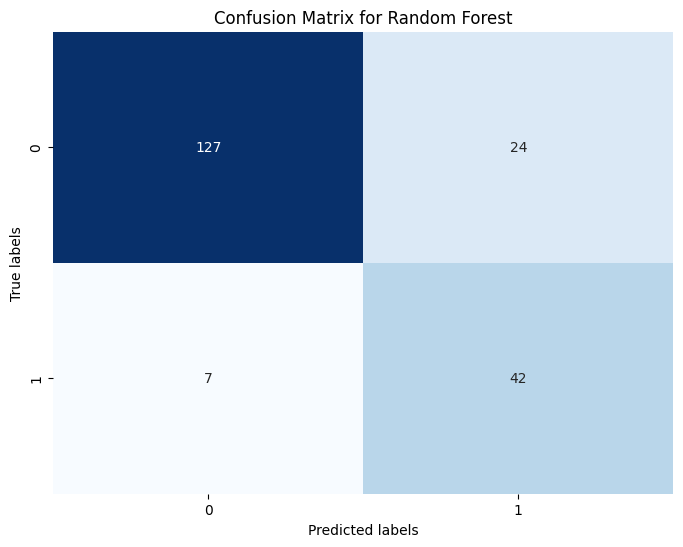

In [271]:
cm_rf_tuned = rf_model.plot_confusion_matrix()

## Model Explanation

PermutationExplainer explainer: 201it [01:30,  1.97it/s]                         


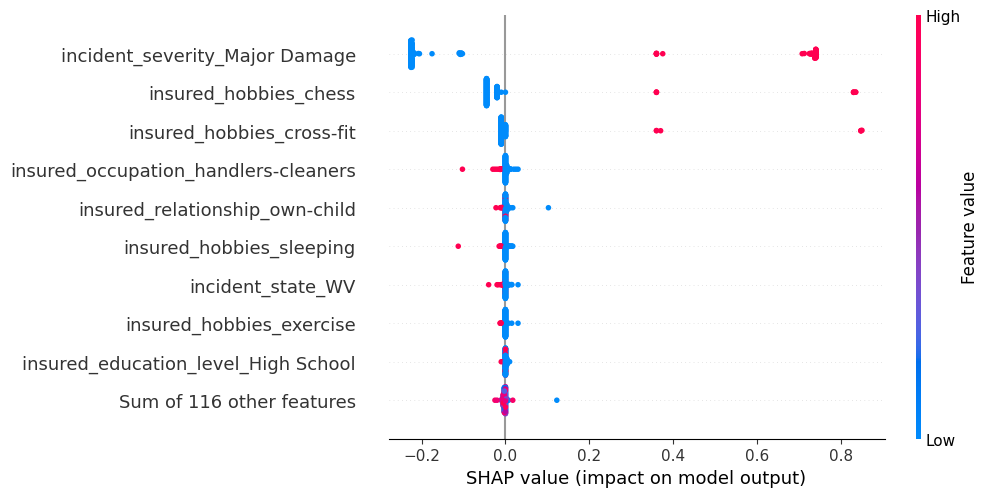

In [273]:
rf_model.shap_explanation()

### Random Oversampling

In [333]:
rf_model.finetune(oversampling_strategy = "RandomOverSampler")

[I 2024-04-07 17:24:33,139] A new study created in memory with name: no-name-032fed89-556b-4c02-b1c8-6732b8637114


Model has already been finetuned. Existing hyperparameters will discarded.


[I 2024-04-07 17:24:34,591] Trial 0 finished with value: 0.6732599951649348 and parameters: {'n_estimators': 500, 'max_depth': 4, 'criterion': 'gini', 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': False}. Best is trial 0 with value: 0.6732599951649348.
[I 2024-04-07 17:24:35,787] Trial 1 finished with value: 0.6876455207398225 and parameters: {'n_estimators': 350, 'max_depth': 3, 'criterion': 'entropy', 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'log2', 'bootstrap': True}. Best is trial 1 with value: 0.6876455207398225.
[I 2024-04-07 17:24:37,002] Trial 2 finished with value: 0.6189524025924844 and parameters: {'n_estimators': 400, 'max_depth': 1, 'criterion': 'log_loss', 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 'log2', 'bootstrap': True}. Best is trial 1 with value: 0.6876455207398225.
[I 2024-04-07 17:24:37,998] Trial 3 finished with value: 0.7126831367943839 and parameters: {'n_estimators': 300, 'max_de

(0.7549580712788261,
 {'n_estimators': 450,
  'max_depth': 4,
  'criterion': 'entropy',
  'min_samples_split': 7,
  'min_samples_leaf': 10,
  'max_features': None,
  'bootstrap': True})

In [334]:
rf_model.train_predict(oversampling_strategy = "RandomOverSampler")
rf_model.evaluate()

{'accuracy': 0.845,
 'precision': 0.6363636363636364,
 'recall': 0.8571428571428571,
 'f1_score': 0.7304347826086957}

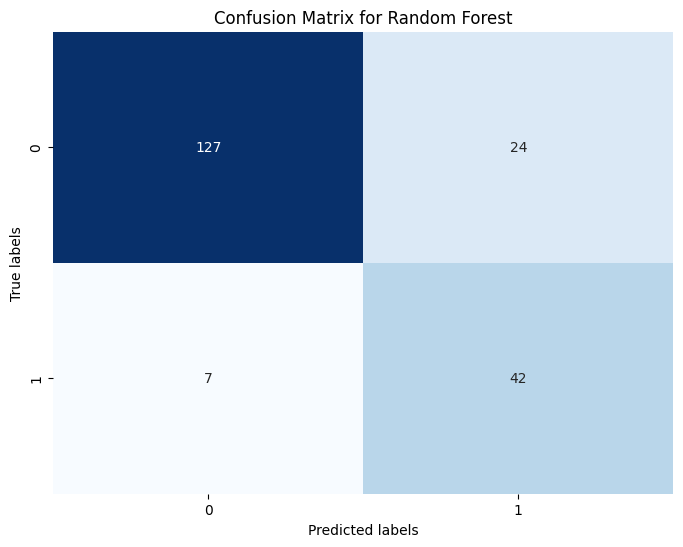

In [335]:
cm_rf_tuned = rf_model.plot_confusion_matrix()

PermutationExplainer explainer: 201it [01:37,  1.85it/s]                         


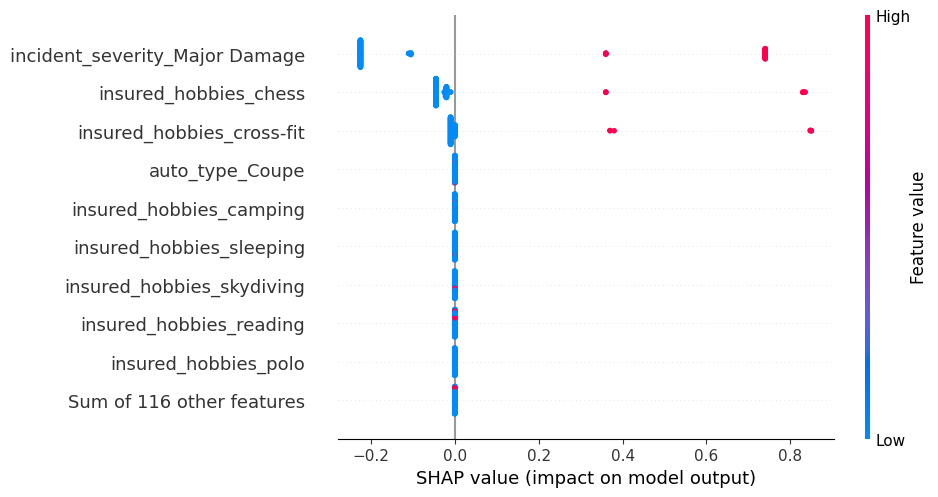

In [336]:
rf_model.shap_explanation()

### ADASYN

In [329]:
rf_model.finetune(oversampling_strategy = "ADASYN")

[I 2024-04-07 17:10:44,923] A new study created in memory with name: no-name-740bc999-7b09-4418-8e37-17d87cd16f88


Model has already been finetuned. Existing hyperparameters will discarded.


[I 2024-04-07 17:10:47,413] Trial 0 finished with value: 0.5692152605459057 and parameters: {'n_estimators': 450, 'max_depth': 8, 'criterion': 'entropy', 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 0 with value: 0.5692152605459057.
[I 2024-04-07 17:10:51,141] Trial 1 finished with value: 0.6983333333333333 and parameters: {'n_estimators': 250, 'max_depth': 3, 'criterion': 'entropy', 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': None, 'bootstrap': False}. Best is trial 1 with value: 0.6983333333333333.
[I 2024-04-07 17:10:54,047] Trial 2 finished with value: 0.47438056523422373 and parameters: {'n_estimators': 450, 'max_depth': 1, 'criterion': 'log_loss', 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': False}. Best is trial 1 with value: 0.6983333333333333.
[I 2024-04-07 17:10:57,166] Trial 3 finished with value: 0.47438056523422373 and parameters: {'n_estimators': 500, 'max_

(0.7486436077293129,
 {'n_estimators': 400,
  'max_depth': 4,
  'criterion': 'entropy',
  'min_samples_split': 8,
  'min_samples_leaf': 1,
  'max_features': None,
  'bootstrap': False})

In [330]:
rf_model.train_predict(oversampling_strategy = "ADASYN")
rf_model.evaluate()

{'accuracy': 0.845,
 'precision': 0.6363636363636364,
 'recall': 0.8571428571428571,
 'f1_score': 0.7304347826086957}

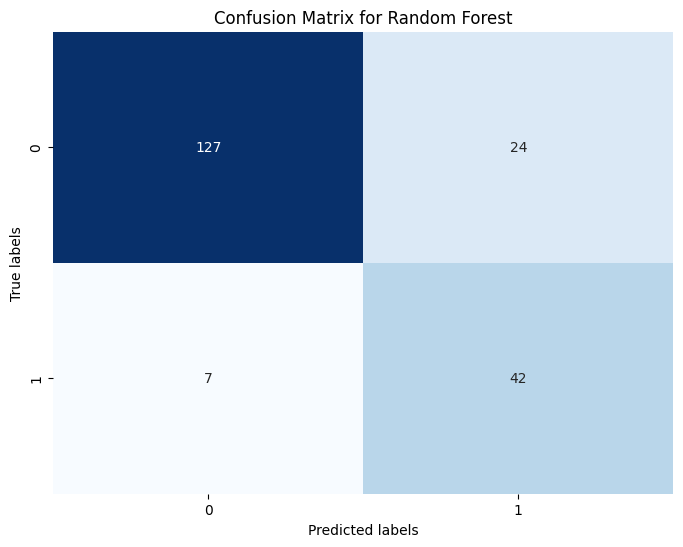

In [331]:
cm_rf_tuned = rf_model.plot_confusion_matrix()

PermutationExplainer explainer: 201it [01:19,  2.19it/s]                         


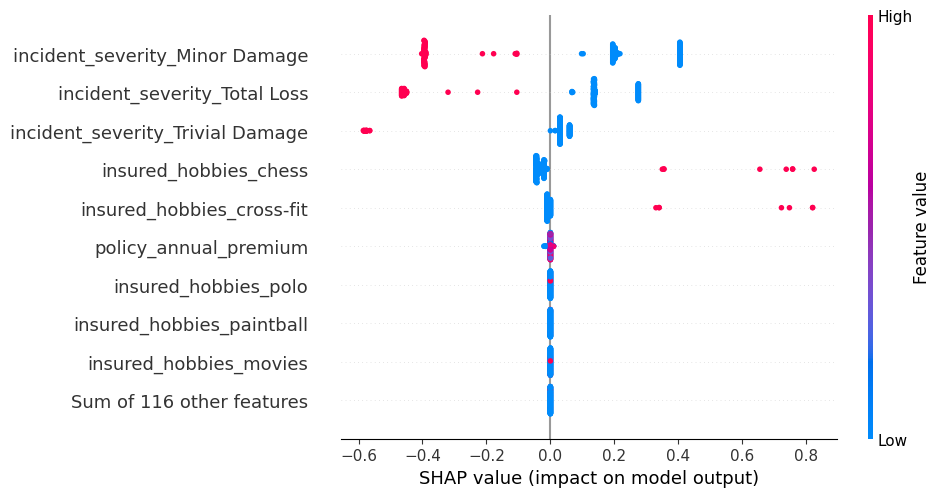

In [332]:
rf_model.shap_explanation()

# Decision Tree

In [274]:
import json
from sklearn.tree import DecisionTreeClassifier

# NOT ACTUAL PARAMS
tuned_params = {
    "max_depth": 10,
    "min_samples_split": 2,
    "min_samples_leaf": 2
}

In [275]:
X_train_non_normalized, X_test_non_normalized, y_train_non_normalized, y_test_non_normalized = preprocessing.preprocess_pipeline(df, encoding=True, normalization=False)
X_train_normalized, X_test_normalized, y_train_normalized, y_test_normalized = preprocessing.preprocess_pipeline(df, encoding=True, normalization=True)

In [276]:
dt_model = models.IndividualModel(
    model_func = DecisionTreeClassifier,
    param_info = parameters.DECISION_TREE_INFORMATION,
    X_train = X_train_non_normalized,
    X_test = X_test_non_normalized,
    y_train = y_train_non_normalized,
    y_test = y_test_non_normalized
    )

## Results without Tuning

In [277]:
dt_model.train()
dt_model.predict()

In [278]:
# No Tuning is already decent, with bad recall though
dt_model.evaluate()

{'accuracy': 0.765,
 'precision': 0.5178571428571429,
 'recall': 0.5918367346938775,
 'f1_score': 0.5523809523809524}

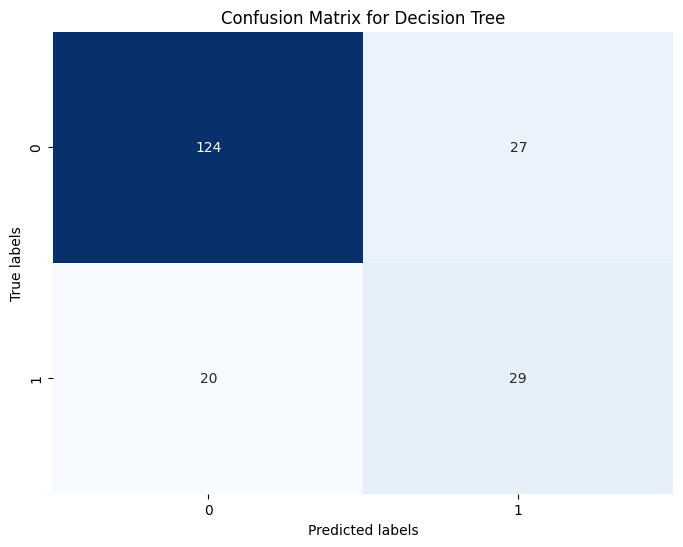

In [279]:
cm_dt_base = dt_model.plot_confusion_matrix()

## Results with Tuning

In [280]:
dt_model.finetune()

[I 2024-04-07 16:14:04,627] A new study created in memory with name: no-name-38585bf9-89d3-4e20-852a-030b69d64c88
[I 2024-04-07 16:14:06,664] Trial 0 finished with value: 0.6497652439101808 and parameters: {'max_depth': 6, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.6497652439101808.
[I 2024-04-07 16:14:08,487] Trial 1 finished with value: 0.6288224072741396 and parameters: {'max_depth': 1, 'min_samples_split': 7, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.6497652439101808.
[I 2024-04-07 16:14:10,306] Trial 2 finished with value: 0.5951817191236596 and parameters: {'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.6497652439101808.
[I 2024-04-07 16:14:12,092] Trial 3 finished with value: 0.6288224072741396 and parameters: {'max_depth': 1, 'min_samples_split': 6, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.6497652439101808.
[I 2024-04-07 16:14:13,876] Trial 4 finished with value: 0.6488716

(0.665458348988121,
 {'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 2})

In [281]:
dt_model.train()
dt_model.predict()

dt_model.evaluate()

{'accuracy': 0.73,
 'precision': 0.45901639344262296,
 'recall': 0.5714285714285714,
 'f1_score': 0.5090909090909091}

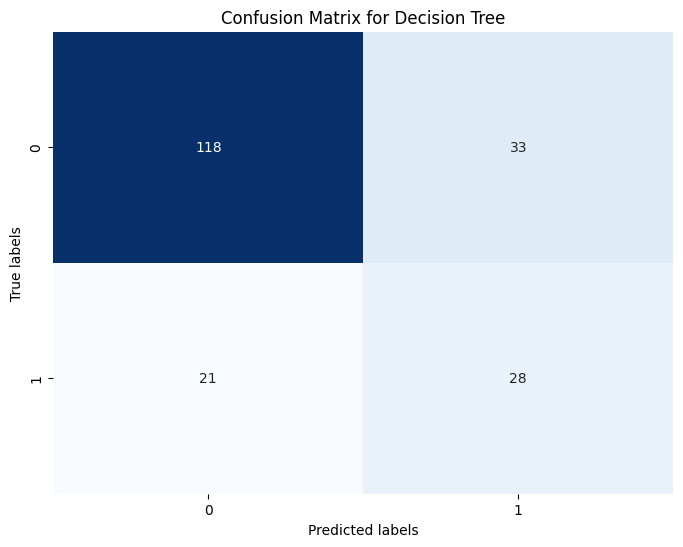

In [282]:
cm_dt_finetuned = dt_model.plot_confusion_matrix()

## Model Explanation

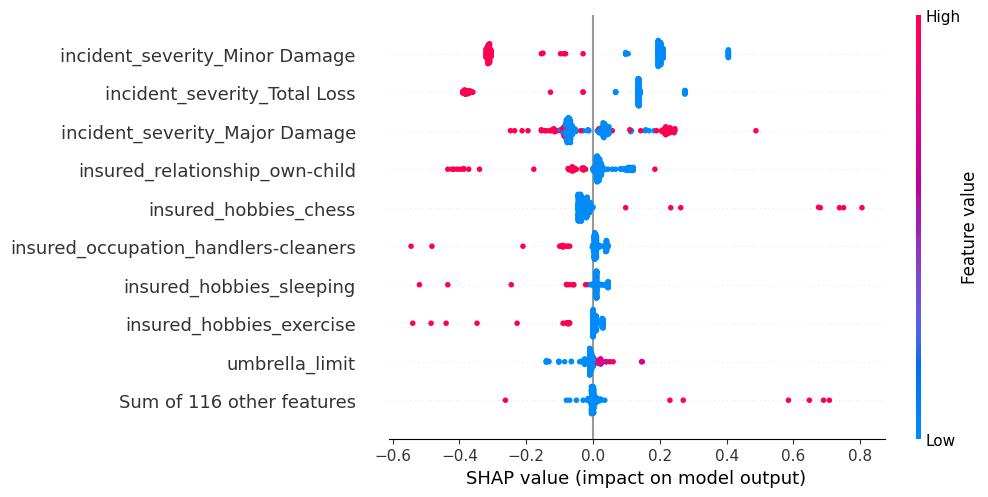

In [284]:
dt_model.shap_explanation()

[Text(0.5625, 0.9166666666666666, 'incident_severity_Major Damage <= 0.5\ngini = 0.5\nsamples = 1204\nvalue = [602, 602]\nclass = Y'),
 Text(0.33035714285714285, 0.75, 'insured_hobbies_chess <= 0.5\ngini = 0.378\nsamples = 688\nvalue = [514, 174]\nclass = Y'),
 Text(0.23214285714285715, 0.5833333333333334, 'insured_hobbies_cross-fit <= 0.5\ngini = 0.342\nsamples = 654\nvalue = [511, 143]\nclass = Y'),
 Text(0.14285714285714285, 0.4166666666666667, 'incident_severity_Minor Damage <= 0.5\ngini = 0.299\nsamples = 622\nvalue = [508, 114]\nclass = Y'),
 Text(0.07142857142857142, 0.25, 'incident_severity_Total Loss <= 0.5\ngini = 0.402\nsamples = 355\nvalue = [256, 99]\nclass = Y'),
 Text(0.03571428571428571, 0.08333333333333333, 'gini = 0.499\nsamples = 143\nvalue = [68, 75]\nclass = N'),
 Text(0.10714285714285714, 0.08333333333333333, 'gini = 0.201\nsamples = 212\nvalue = [188, 24]\nclass = Y'),
 Text(0.21428571428571427, 0.25, 'total_claim_amount <= 80348.5\ngini = 0.106\nsamples = 267\nv

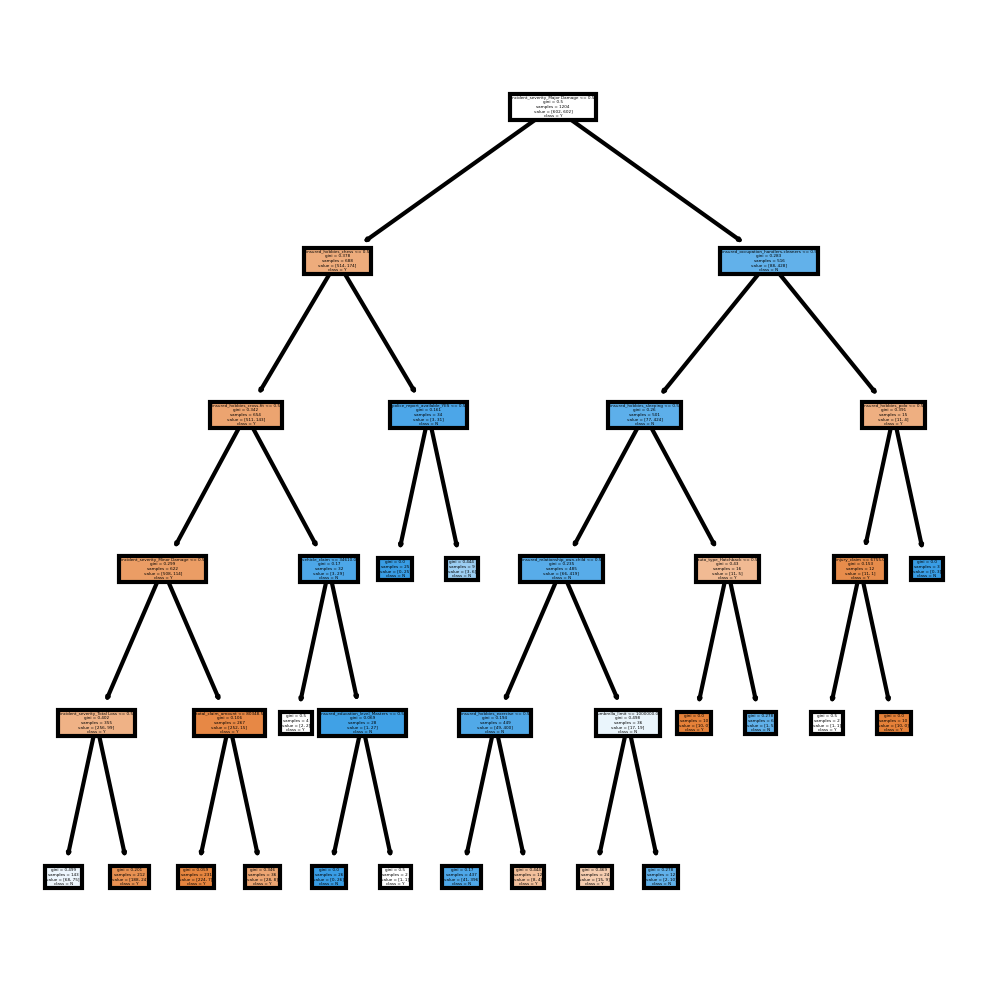

In [285]:
from sklearn import tree

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

feature_names = list(dt_model.X_test.columns.copy())

class_names=['Y', 'N']

tree.plot_tree(dt_model.model,
               feature_names = feature_names, 
               class_names=class_names,
               filled = True)

# XGBoost

## Dataset Creation

In [337]:
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = preprocessing.preprocess_pipeline(
    df,
    encoding = False,
    normalization = False,
    )

In [338]:
rows_with_nan = X_train_xgb[X_train_xgb.isna().any(axis=1)]

In [344]:
# Format the data into categorical type

cate_cols = parameters.cate_cols

X_train_xgb[cate_cols] = X_train_xgb[cate_cols].astype("category")
X_test_xgb[cate_cols] = X_test_xgb[cate_cols].astype("category")

In [345]:
X_train_xgb.dtypes

months_as_customer                                 int64
age                                                int64
policy_state                                    category
policy_deductable                                  int64
policy_annual_premium                            float64
umbrella_limit                                     int64
insured_sex                                     category
insured_education_level                         category
insured_occupation                              category
insured_hobbies                                 category
insured_relationship                            category
capital-gains                                      int64
capital-loss                                       int64
incident_year                                      int64
incident_type                                   category
collision_type                                  category
incident_severity                               category
authorities_contacted          

## Model Creation

In [346]:
xgb_static_params = {
    "enable_categorical": True # Enable categorical data
}

In [347]:
from xgboost import XGBClassifier
xgb_model = models.IndividualModel(
    model_func = XGBClassifier,
    param_info = parameters.XGB_INFORMATION,
    X_train = X_train_xgb,
    X_test = X_test_xgb,
    y_train = y_train_xgb,
    y_test = y_test_xgb,
    static_params = xgb_static_params
    )

## Results with no tuning

In [348]:
xgb_model.train_predict()

xgb_model.evaluate()

{'accuracy': 0.83,
 'precision': 0.6415094339622641,
 'recall': 0.6938775510204082,
 'f1_score': 0.6666666666666666}

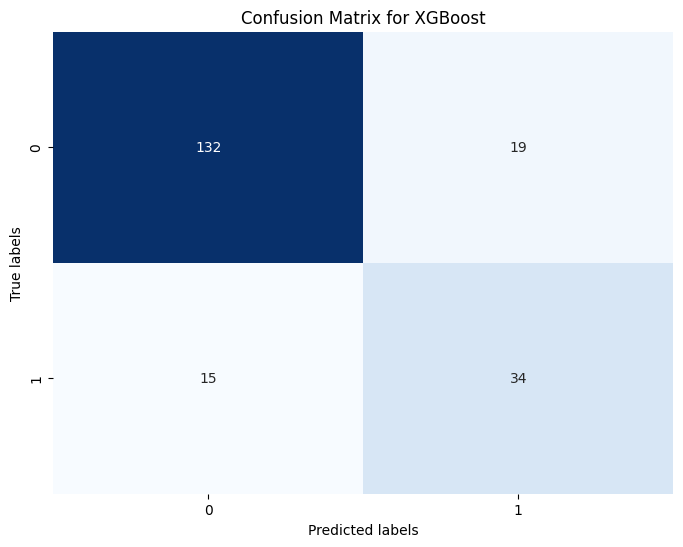

In [349]:
cm_xgb_base = xgb_model.plot_confusion_matrix()

## Results with Tuning

In [41]:
xgb_model.finetune()

[I 2024-04-07 11:50:32,913] A new study created in memory with name: no-name-70d226b0-2a43-485c-958c-5d818c9951b2
[I 2024-04-07 11:50:34,079] Trial 0 finished with value: 0.6974466974224681 and parameters: {'n_estimators': 19, 'max_depth': 32, 'learning_rate': 0.47000000000000003, 'subsample': 0.8, 'colsample_bytree': 0.7, 'gamma': 1.5, 'reg_alpha': 3.9000000000000004, 'reg_lambda': 3.3000000000000003}. Best is trial 0 with value: 0.6974466974224681.
[I 2024-04-07 11:50:35,830] Trial 1 finished with value: 0.6478272072754832 and parameters: {'n_estimators': 237, 'max_depth': 7, 'learning_rate': 0.48000000000000004, 'subsample': 0.4, 'colsample_bytree': 0.35000000000000003, 'gamma': 3.0, 'reg_alpha': 0.4, 'reg_lambda': 1.3}. Best is trial 0 with value: 0.6974466974224681.
[I 2024-04-07 11:50:37,134] Trial 2 finished with value: 0.7487820389653919 and parameters: {'n_estimators': 14, 'max_depth': 22, 'learning_rate': 0.01, 'subsample': 0.4, 'colsample_bytree': 0.9000000000000001, 'gamma'

(0.7681783851886946,
 {'n_estimators': 27,
  'max_depth': 36,
  'learning_rate': 0.02,
  'subsample': 0.30000000000000004,
  'colsample_bytree': 0.75,
  'gamma': 4.2,
  'reg_alpha': 0.8,
  'reg_lambda': 0.7000000000000001})

In [44]:
xgb_model.train_predict()

xgb_model.evaluate()

{'accuracy': 0.835,
 'precision': 0.625,
 'recall': 0.8163265306122449,
 'f1_score': 0.7079646017699115}

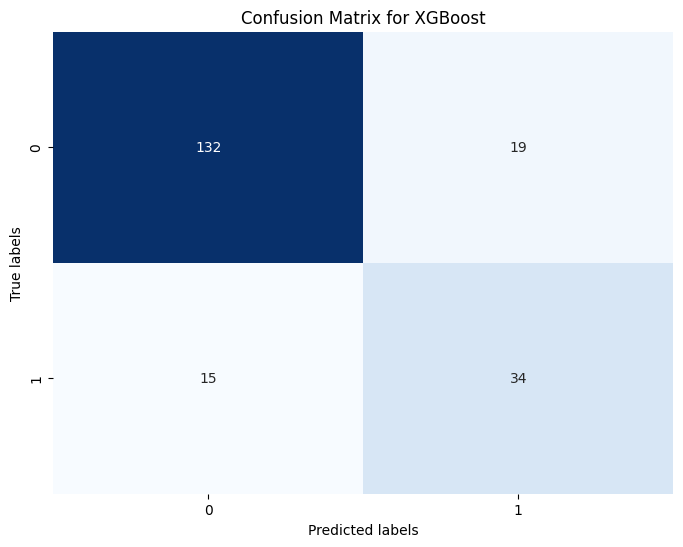

In [350]:
cm_xgb_tuned = xgb_model.plot_confusion_matrix()

## Model Explanation

### SHAP Values

In [351]:
xgb_model.shap_explanation()

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

### XGBoost Native Explanation

<Axes: title={'center': 'Tuned XGBoost Feature Importance'}, xlabel='F score', ylabel='Features'>

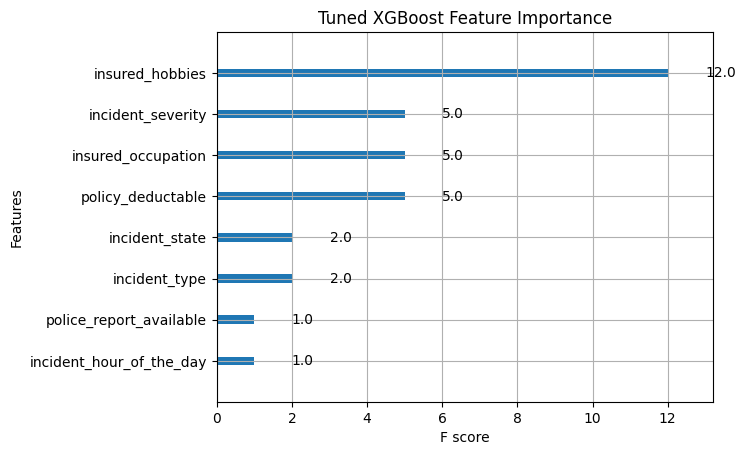

In [43]:
import xgboost as xgb

xgb.plot_importance(xgb_model.model, title="Tuned XGBoost Feature Importance")

# MLP

## Dataset creation

In [293]:
X_train_mlp, X_test_mlp, y_train_mlp, y_test_mlp = preprocessing.preprocess_pipeline(
    df,
    encoding = True,
    normalization = True,
    )

In [294]:
from sklearn.neural_network import MLPClassifier
mlp_static_params = {
    "random_state": 42,
    "solver": "adam" # Enable categorical data
}
mlp_model = models.IndividualModel(
    model_func=MLPClassifier,
    param_info=parameters.MLP_INFORMATION,
    X_train=X_train_mlp,
    X_test=X_test_mlp,
    y_train=y_train_mlp,
    y_test=y_test_mlp,
    static_params = mlp_static_params
)

## Baseline

In [295]:
mlp_model.train_predict()
mlp_model.evaluate()

{'accuracy': 0.825,
 'precision': 0.6129032258064516,
 'recall': 0.7755102040816326,
 'f1_score': 0.6846846846846848}

In [296]:
mlp_model.finetune()

[I 2024-04-07 16:23:19,637] A new study created in memory with name: no-name-be1b351c-151a-4955-8902-bbedbd808fcc
[I 2024-04-07 16:23:25,251] Trial 0 finished with value: 0.524515780980207 and parameters: {'hidden_layer_sizes': 70, 'alpha': 0.0025337416961595527, 'learning_rate_init': 0.006164926704677976, 'max_iter': 350}. Best is trial 0 with value: 0.524515780980207.
[I 2024-04-07 16:23:31,551] Trial 1 finished with value: 0.35508594983967073 and parameters: {'hidden_layer_sizes': 120, 'alpha': 0.0009697385133197264, 'learning_rate_init': 0.0027824169435152865, 'max_iter': 550}. Best is trial 0 with value: 0.524515780980207.
[I 2024-04-07 16:23:38,447] Trial 2 finished with value: 0.4194701938876551 and parameters: {'hidden_layer_sizes': 190, 'alpha': 0.0024827611755023375, 'learning_rate_init': 0.002502126907743748, 'max_iter': 650}. Best is trial 0 with value: 0.524515780980207.
[I 2024-04-07 16:23:44,860] Trial 3 finished with value: 0.39284282470868537 and parameters: {'hidden_l

(0.6747273734215314,
 {'hidden_layer_sizes': 170,
  'alpha': 0.0007957777623102827,
  'learning_rate_init': 0.0008892064354854472,
  'max_iter': 350})

In [304]:
mlp_model.train_predict()

mlp_model.evaluate()

{'accuracy': 0.375,
 'precision': 0.27906976744186046,
 'recall': 0.9795918367346939,
 'f1_score': 0.4343891402714932}

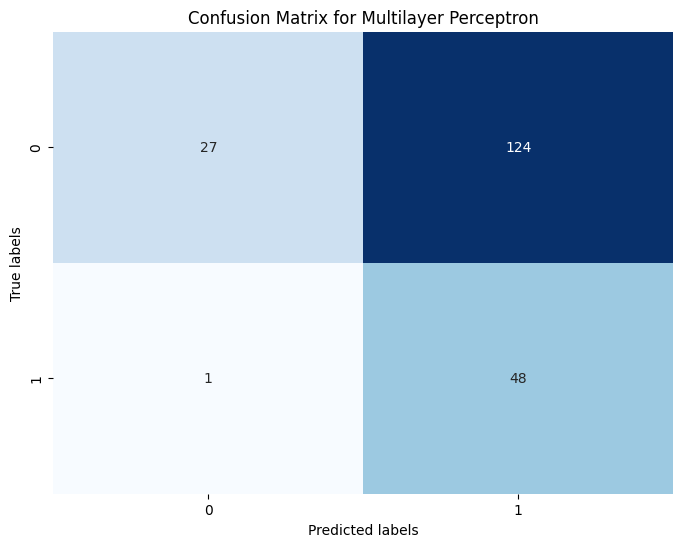

In [305]:
cm_mlp_tuned = mlp_model.plot_confusion_matrix()

PermutationExplainer explainer: 201it [00:13,  3.64it/s]                         


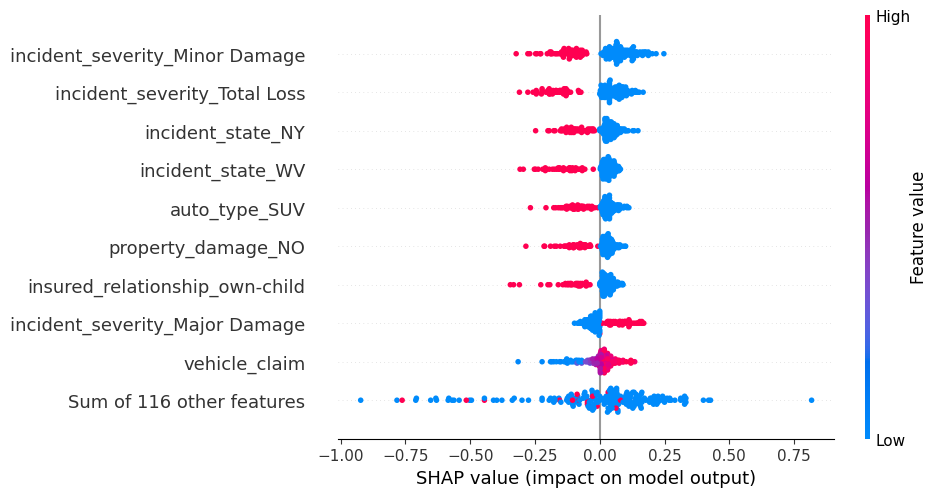

In [306]:
mlp_model.shap_explanation()

## LightGBM

In [307]:
X_train_lgb, X_test_lgb, y_train_lgb, y_test_lgb = preprocessing.preprocess_pipeline(
    df,
    encoding = True,
    normalization = False, # Gradient boosting agnostic to normalisation
    )

In [308]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

lgb_static_params = {
    "random_state": 42,
    "verbose": -1,
}

lgb_model = models.IndividualModel(
    model_func=lgb.LGBMClassifier,
    param_info=parameters.LGBM_INFORMATION,
    X_train=X_train_lgb,
    X_test=X_test_lgb,
    y_train=y_train_lgb,
    y_test=y_test_lgb,
    static_params=lgb_static_params
)

In [309]:
lgb_model.train_predict()
lgb_model.evaluate()

{'accuracy': 0.815,
 'precision': 0.6153846153846154,
 'recall': 0.6530612244897959,
 'f1_score': 0.6336633663366337}

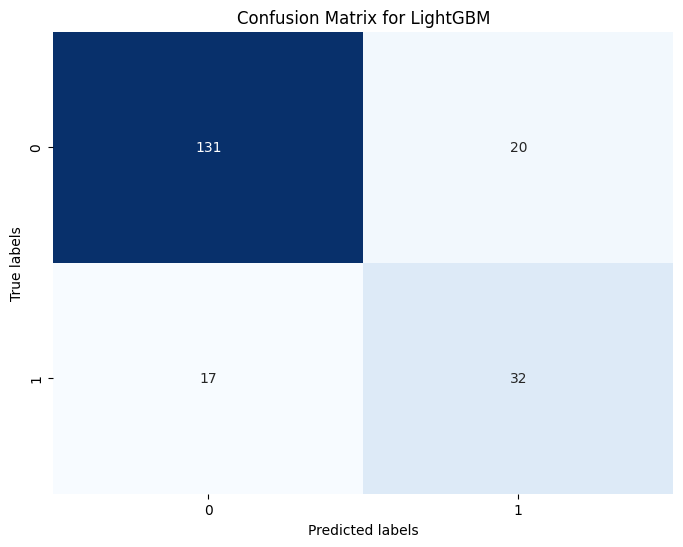

In [310]:
cm_lgb = lgb_model.plot_confusion_matrix()

In [311]:
lgb_model.finetune()

[I 2024-04-07 16:41:58,924] A new study created in memory with name: no-name-8a79988f-7e44-41ba-a8c4-14b5d054b19f
[I 2024-04-07 16:42:03,142] Trial 0 finished with value: 0.658339158052214 and parameters: {'n_estimators': 450, 'num_leaves': 15, 'learning_rate': 0.02234144976671305, 'subsample': 0.8, 'colsample_bytree': 0.3, 'min_child_samples': 18, 'reg_alpha': 0.7675095598866005, 'reg_lambda': 9.214540981056633e-07}. Best is trial 0 with value: 0.658339158052214.
[I 2024-04-07 16:42:06,959] Trial 1 finished with value: 0.6560443869498253 and parameters: {'n_estimators': 350, 'num_leaves': 2, 'learning_rate': 0.11002556613912648, 'subsample': 0.7, 'colsample_bytree': 0.6000000000000001, 'min_child_samples': 26, 'reg_alpha': 2.378272465699319e-06, 'reg_lambda': 2.8513060618083252}. Best is trial 0 with value: 0.658339158052214.
[I 2024-04-07 16:42:11,078] Trial 2 finished with value: 0.6698503952882152 and parameters: {'n_estimators': 200, 'num_leaves': 154, 'learning_rate': 0.072739837

(0.7562870820935338,
 {'n_estimators': 100,
  'num_leaves': 155,
  'learning_rate': 0.015381040876633353,
  'subsample': 1.0,
  'colsample_bytree': 0.8,
  'min_child_samples': 15,
  'reg_alpha': 3.272239554871888,
  'reg_lambda': 1.8722057238011285e-07})

In [318]:
lgb_model.train_predict()
lgb_model.evaluate()

{'accuracy': 0.845,
 'precision': 0.6363636363636364,
 'recall': 0.8571428571428571,
 'f1_score': 0.7304347826086957}

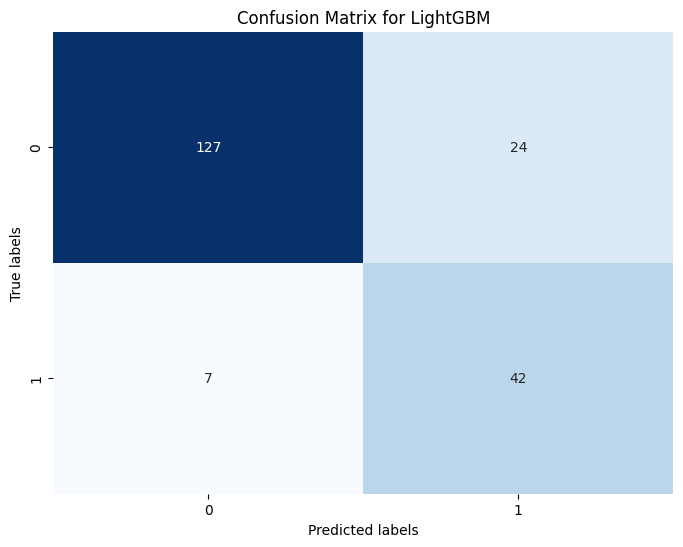

In [317]:
cm_lgb_tuned = lgb_model.plot_confusion_matrix()

PermutationExplainer explainer: 201it [00:13,  3.65it/s]                         


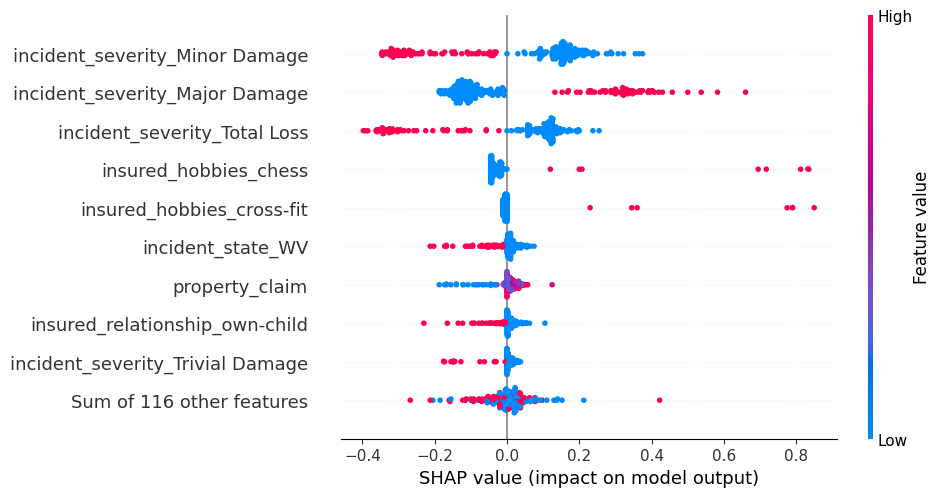

In [319]:
lgb_model.shap_explanation()

### What if i used random oversampling instead?

In [321]:
lgb_model.finetune(oversampling_strategy = 'RandomOverSampler')

[I 2024-04-07 16:53:05,900] A new study created in memory with name: no-name-c654f598-7959-4691-8dbf-0e430ccf540e


Model has already been finetuned. Existing hyperparameters will discarded.


[I 2024-04-07 16:53:06,291] Trial 0 finished with value: 0.7302790100784584 and parameters: {'n_estimators': 150, 'num_leaves': 56, 'learning_rate': 0.003926515932399185, 'subsample': 0.55, 'colsample_bytree': 1.0, 'min_child_samples': 20, 'reg_alpha': 1.0794973315089333, 'reg_lambda': 1.0611802077860777}. Best is trial 0 with value: 0.7302790100784584.
[I 2024-04-07 16:53:06,950] Trial 1 finished with value: 0.6821488314229753 and parameters: {'n_estimators': 150, 'num_leaves': 164, 'learning_rate': 0.07348220941804862, 'subsample': 0.7, 'colsample_bytree': 1.0, 'min_child_samples': 12, 'reg_alpha': 1.1534225883468407e-05, 'reg_lambda': 0.05299532956867544}. Best is trial 0 with value: 0.7302790100784584.
[I 2024-04-07 16:53:07,593] Trial 2 finished with value: 0.45611229350359783 and parameters: {'n_estimators': 250, 'num_leaves': 36, 'learning_rate': 0.008061605804477269, 'subsample': 0.25, 'colsample_bytree': 0.15000000000000002, 'min_child_samples': 13, 'reg_alpha': 1.199718731789

(0.7574368559201725,
 {'n_estimators': 350,
  'num_leaves': 4,
  'learning_rate': 0.032158660448341,
  'subsample': 0.30000000000000004,
  'colsample_bytree': 0.9000000000000001,
  'min_child_samples': 3,
  'reg_alpha': 6.235920630554453,
  'reg_lambda': 2.810666886928073e-06})

In [322]:
lgb_model.train_predict(oversampling_strategy = 'RandomOverSampler')
lgb_model.evaluate()

{'accuracy': 0.845,
 'precision': 0.6363636363636364,
 'recall': 0.8571428571428571,
 'f1_score': 0.7304347826086957}

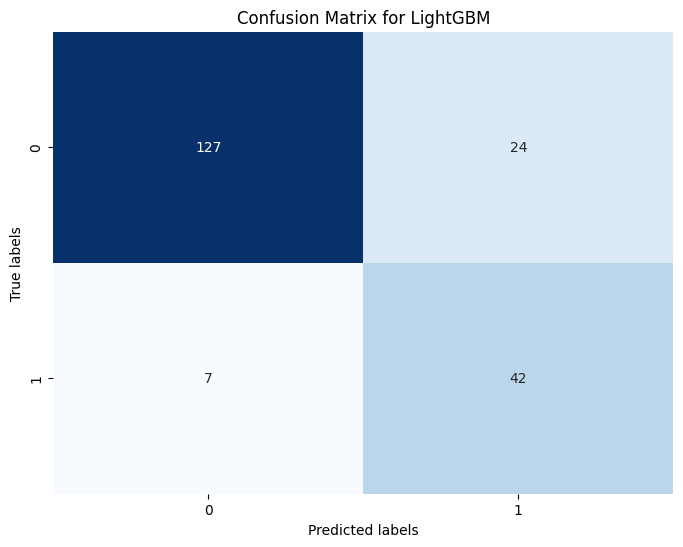

In [323]:
cm_lgb_tuned = lgb_model.plot_confusion_matrix()

PermutationExplainer explainer: 201it [00:16,  4.71it/s]                         


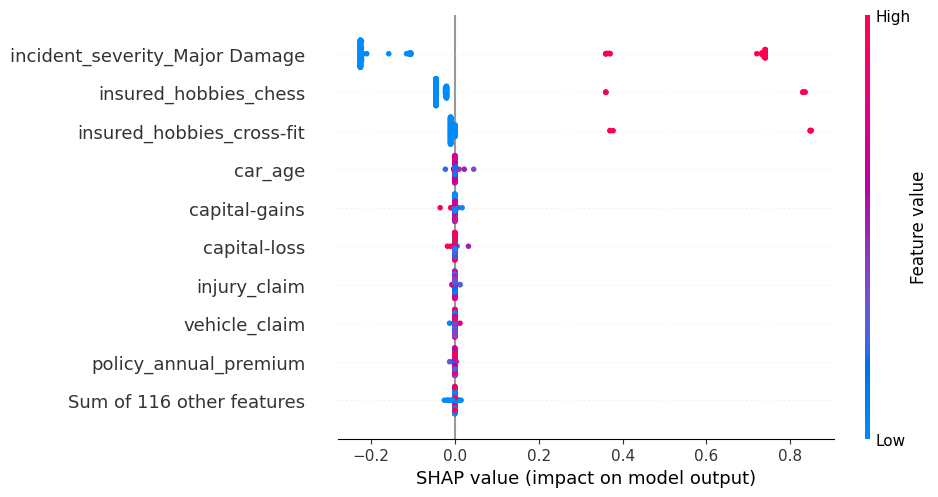

In [324]:
lgb_model.shap_explanation()

### What if I used ADASYN instead?

In [325]:
lgb_model.finetune(oversampling_strategy = 'ADASYN')

[I 2024-04-07 17:00:20,214] A new study created in memory with name: no-name-360f104b-a595-4df8-8bb4-17cf4451dc3a


Model has already been finetuned. Existing hyperparameters will discarded.


[I 2024-04-07 17:00:20,829] Trial 0 finished with value: 0.5582204288920706 and parameters: {'n_estimators': 250, 'num_leaves': 31, 'learning_rate': 0.15333832163983524, 'subsample': 0.7, 'colsample_bytree': 0.2, 'min_child_samples': 28, 'reg_alpha': 0.00019610242115319815, 'reg_lambda': 2.319584533755093e-08}. Best is trial 0 with value: 0.5582204288920706.
[I 2024-04-07 17:00:22,368] Trial 1 finished with value: 0.62235214576678 and parameters: {'n_estimators': 300, 'num_leaves': 152, 'learning_rate': 0.039370104728998725, 'subsample': 0.65, 'colsample_bytree': 0.9500000000000001, 'min_child_samples': 17, 'reg_alpha': 1.530562130809748e-05, 'reg_lambda': 1.6818359674234365e-08}. Best is trial 1 with value: 0.62235214576678.
[I 2024-04-07 17:00:22,800] Trial 2 finished with value: 0.595055173137365 and parameters: {'n_estimators': 200, 'num_leaves': 12, 'learning_rate': 0.10556621314463145, 'subsample': 1.0, 'colsample_bytree': 0.3, 'min_child_samples': 28, 'reg_alpha': 0.000144028881

(0.7186126063474287,
 {'n_estimators': 450,
  'num_leaves': 5,
  'learning_rate': 0.00896419588265798,
  'subsample': 0.4,
  'colsample_bytree': 0.8,
  'min_child_samples': 21,
  'reg_alpha': 6.247761828699088e-07,
  'reg_lambda': 0.0784485085616853})

In [326]:
lgb_model.train_predict(oversampling_strategy = 'ADASYN')
lgb_model.evaluate()

{'accuracy': 0.85,
 'precision': 0.6507936507936508,
 'recall': 0.8367346938775511,
 'f1_score': 0.7321428571428571}

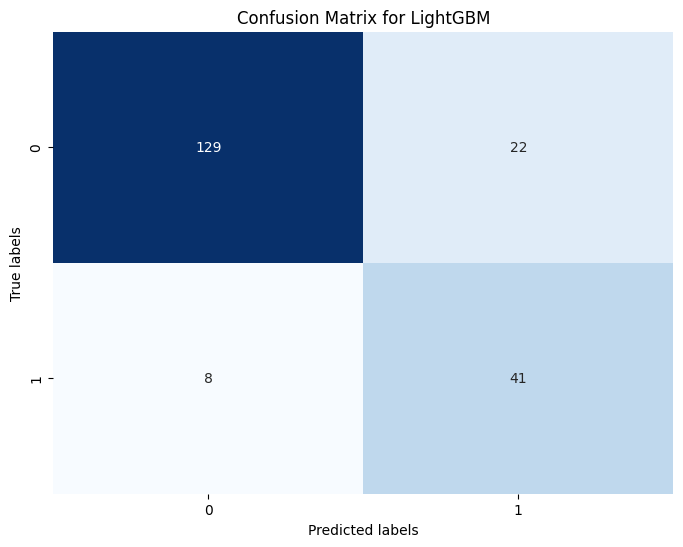

In [327]:
cm_lgb_tuned = lgb_model.plot_confusion_matrix()

PermutationExplainer explainer: 201it [00:20,  5.03it/s]                         


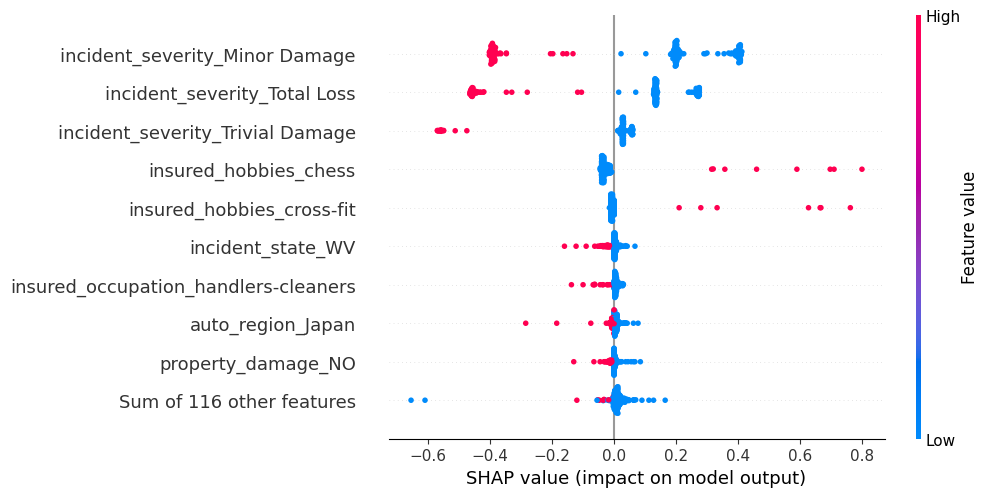

In [328]:
lgb_model.shap_explanation()

# Logistic Regression

In [ ]:
X_train_lr, X_test_lr, y_train_lr, y_test_lr = preprocessing.preprocess_pipeline(
    df,
    encoding = True,
    normalization = True, # LR needs normalisation
    )

# Support Vector Machine

In [ ]:
X_train_svm, X_test_svm, y_train_svm, y_test_svm = preprocessing.preprocess_pipeline(
    df,
    encoding = True,
    normalization = True, # SVM needs normalisation
    )